In [1]:
from __future__ import print_function, division
import numpy as np
import sympy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Computational Mathematics I, Project 3

# Author: Foivos Lampadaridis Kokkinakis

## Simpson's Method

The function below will calculate any integral of the form $I=\int_{a}^{b} \int_{y_1(x)}^{y_2(x)} f(x,y) \,dx\,dy$

In [2]:
#Our function takes as input:
#1) The function f(x,y) we are trying to integrate
#2) , 3) The lower a and upper b limits of integration with respect to x
#4) #A list n_list containing the intervals that x will be brocken up into at each iteration
#5) , 6) The lower y1(x) and upper y2(x) limits of integration with respect to y
# 7) #A list m_list containing the intervals that y will be brocken up into at each iteration

def doubleSimpson(f,a,b,n_list,y1,y2,m_list):
    
    I=np.zeros((len(n_list),len(m_list)))#The array that will contain the numerical approximations of our integral for different values of m and n
    
    for n_index, n in enumerate(n_list):#For every interval of x contained in n_list and n_index is the index counting the iteration of n we are in
        h=(b-a)/n #The step of the x direction is calculated
        
        for m_index, m in enumerate(m_list):#For every interval of y contained in m_list and m_index is the index counting the iteration of m we are in
        
    
            #The even ,odd and end terms of the final step (intagrating for x) are normalized at 0
            Jend=0
            Jeven=0
            Jodd=0

            for i in range(n+1): #for i=0,..n
                x=a+i*h #We calculate x after i steps
                
                k=(y2(x)-y1(x))/m #The step in the y direction k(x) is calculated (numerical since x has a numerical value)
        
                #The even ,odd and end terms of the intermidiate  step (intagrating for y, numerical)
                Lend=f(x,y1(x))+f(x,y2(x)) #The end terms Lend(x) of the intermidiate step is calculated here
                #While the even Leven(x) and odd turms Lodd(x) are normalized at 0
                Leven=0
                Lodd=0
                
                for j in range(1,m): #for j=1,...,m-1 (j=0 and j=m have already been used in Lend)
                    y=y1(x)+j*k #We calculate y(x) after j steps (numerical since x has a numerical value)
                    Q=f(x,y) #Q is the value of f(x,y) after i steps in the x direction and j steps in the y direction
                    
                    if j%2==0: #If the index in the y direction is even
                        Leven=Leven+Q #Then Q is added to Leven(x)
                    else: #If the index in the y direction is even
                        Lodd=Lodd+Q#Then Q is added to Lodd
                        
                #The aplication of simpons rule for the intermidiate step (integration for x)        
                g=k/3*(Lend+2*Leven+4*Lodd) 
                
        
                if i==n or i==0: #If the index in the x direction is on the end
                    Jend=Jend+g #Then g is on either end is added on Jeven
        
                elif i%2==0: #If the index in the x direction is even
                    Jeven=Jeven+g #Then g is added to Jeven
                else: #If the index in the x direction is even
                    Jodd=Jodd+g #Then g is added to Jodd
                    
                    
            #The aplication of simpons rule for the final step (integration for x) The result with intervals n and m is saven in the
            #nth-mth position of array I
            I[n_index][m_index]=h/3*(Jend+2*Jeven+4*Jodd) 
            
            
        
    return I 
    #Our function returns:
    # 1) Array I which contains the numerical results we get for the calculation of I for different values of n and m

We firsly define the integrated funtion $f(x,y)$

In [3]:
def f(x,y):
    return x**2+y**3

Then we define the limits in the y direction $y_1(x)=x$ and $y_2(x)=2x$ and on the x direction aI=0, bI=1

In [4]:
def y1(x):
    return x
def y2(x):
    return 2*x

aI,bI=0,1

Finally we define the list containing the different intervals $m$ and $n$. We went with 4,8,50,100,2000.: __Note__ these numbers are all even which is a neccesity if we are to apply Simson's rule.

In [5]:
n_listI=[4,8,50,100,200]
m_listI=[4,8,50,100,200]


We use our function to calculate the given integral 25 times, 1 for every combination of intervals in n_list and m_list. We save our result in I_mn.

In [6]:
I_mn=doubleSimpson(f,aI,bI,n_listI,y1,y2,m_listI)
with np.printoptions(precision=15, suppress=True):
    print(f'The results we get from our function are: \nI={I_mn}')

The results we get from our function are: 
I=[[1.001953125     1.001953125     1.001953125     1.001953125
  1.001953125    ]
 [1.0001220703125 1.0001220703125 1.0001220703125 1.0001220703125
  1.0001220703125]
 [1.00000008      1.00000008      1.00000008      1.00000008
  1.00000008     ]
 [1.000000005     1.000000005     1.000000005     1.000000005
  1.000000005    ]
 [1.0000000003125 1.0000000003125 1.0000000003125 1.0000000003125
  1.0000000003125]]


We create a list containing 1000 points between the minimum and maximum of n_listI, and then calculate the corresponding values of h and save them in h_values. Our goal here is to apply the theoretical formula that we reached for our problem: $E=\frac{h^4}{2}$ and to plot it. Thus theoretical_error_values will hold the value of the expected error for ever $h$ in h_values.

In [7]:
n_values=np.linspace(min(n_listI),max(n_listI),1000)
h_values=np.ones(1000)/n_values
theoretical_error_values=h_values**4/2

Having calculated the numerical values of $I$ with Simpson's method we can calculate the true error acording to our calculations. We name tose as true_error_mn.

In [8]:
true_error_mn=abs(I_mn-1)
print(f'The true error of every one of our numerical calculations is:\n et={true_error_mn}')

The true error of every one of our numerical calculations is:
 et=[[1.95312500e-03 1.95312500e-03 1.95312500e-03 1.95312500e-03
  1.95312500e-03]
 [1.22070312e-04 1.22070312e-04 1.22070312e-04 1.22070312e-04
  1.22070312e-04]
 [8.00000002e-08 8.00000002e-08 8.00000000e-08 8.00000000e-08
  8.00000000e-08]
 [5.00000019e-09 4.99999997e-09 4.99999997e-09 4.99999997e-09
  5.00000019e-09]
 [3.12500248e-10 3.12500248e-10 3.12500248e-10 3.12500248e-10
  3.12500248e-10]]


We name the results we got for our true error of $m=50$ ,e_n_50

In [9]:
e_n_50=true_error_mn[:,2]

Now we will test if the theoretical framework explained in the project has any validity. To do so fistly we will plot the true errors we calculated for $m=50$ e_n_50 as a function of the number of intervals in the $x$ direction $n$ n_list_I. Then we will plot the theoretical curve of the true error  by plotting theoretical_error_values as a function of n_values. __We expext the points (our data) to follow the theoretical curve perfectly__

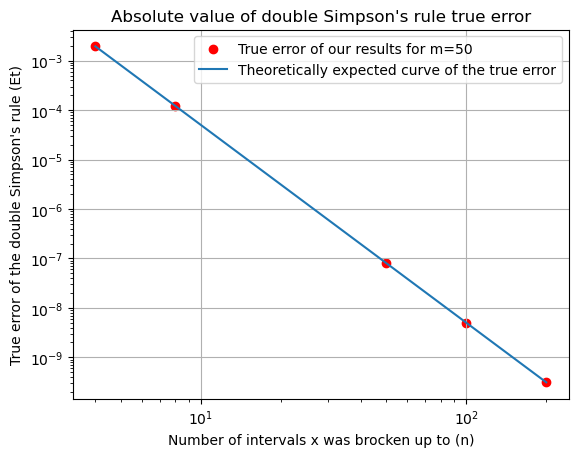

In [13]:
#A plot of the true error when n=50 and n changes
fig, ax = plt.subplots()

ax.scatter(n_listI,e_n_50,c='red',label='True error of our results for m=50') #plotting the scatter of the total error calculated from us 
ax.plot(n_values,theoretical_error_values,label='Theoretically expected curve of the true error') #plotting the curve of the theoretical total error

ax.set(xlabel='Number of intervals x was brocken up to (n)', ylabel="True error of the double Simpson's rule (Et)") #Labels of axis

#log log scale
ax.set_yscale('log') 
ax.set_xscale('log')

ax.set_title("Absolute value of double Simpson's rule true error") #Title
ax.legend() #show legend
ax.grid()
plt.savefig("Simpson.pdf")
plt.show()